In [23]:
using Plots

In [28]:
Mpl = 2.435e18 # reduced Planck mass in GeV
c = 299792458 # speed of light in m/s
KinGeV = (1.160e4)^-1 * 10^-9 # Kelvin in GeV
Mpcinm = 3.086e16 * 10^6 # Mpc in m
GeVinminv = 10^9/(1.973e-7) # GeV in m^-1
GeVinMpcinv = GeVinminv * Mpcinm # GeV in Mpc^-1
MpcinvinHz = c/Mpcinm # Mpc^inv in Hz
yrins = 365.2422 * 24 * 60 * 60 # yr in s

Or0h2 = 4.2e-5 # current radiation density parameter * h^2
Hubblh = 0.674 # normalised Hubble parameter h

0.674

In [8]:
ai = [1, 1.11724, 3.12672e-1, -4.68049e-2, -2.65004e-2, -1.19760e-3, 1.82812e-4, 1.36436e-4, 8.55051e-5, 1.22840e-5, 3.82259e-7, -6.87035e-9]
bi = [1.43382e-2, 1.37559e-2, 2.92108e-3, -5.38533e-4, -1.62496e-4, -2.87906e-5, -3.84278e-6, 2.78776e-6, 7.40342e-7, 1.17210e-7, 3.72499e-9, -6.74107e-11]
ci = [1, 6.07869e-1, -1.54485e-1, -2.24034e-1, -2.82147e-2, 2.90620e-2, 6.86778e-3, -1.00005e-3, -1.69104e-4, 1.06301e-5, 1.69528e-6, -9.33311e-8]
di = [7.07388e1, 9.18011e1, 3.31892e1, -1.39779, -1.52558, -1.97857e-2, -1.60146e-1, 8.22615e-5, 2.02651e-2, -1.82134e-5, 7.83943e-5, 7.13518e-5]

12-element Vector{Float64}:
 70.7388
 91.8011
 33.1892
 -1.39779
 -1.52558
 -0.0197857
 -0.160146
  8.22615e-5
  0.0202651
 -1.82134e-5
  7.83943e-5
  7.13518e-5

In [21]:
grhohigh(T) = sum([ai[i]*log(T)^(i - 1) for i=1:12]) / sum([bi[i]*log(T)^(i - 1) for i=1:12]) # eff. DoF for energy density for T > 0.12 GeV
gshigh(T) = grhohigh(T) / (1 + sum([ci[i]*log(T)^(i - 1) for i=1:12])) / sum([di[i]*log(T)^(i - 1) for i=1:12]) # eff. DoF for entropy for T > 0.12 GeV

gshigh (generic function with 1 method)

In [30]:
rhohigh(T) = π^2/30*grhohigh(T)*T^4 # energy density for T > 0.12 GeV
shigh(T) = 2*π^2/45*gshigh(T)*T^3 # entropy for T > 0.12 GeV
phigh(T) = T*shigh(T) - rhohigh(T) # pressure for T > 0.12 GeV

phigh (generic function with 1 method)

In [31]:
# some fitting functions
Sfit(x) = 1 + 7/4*exp(-1.0419*x) * (1 + 1.034*x + 0.456426*x^2 + 0.0595249*x^3)
frho(x) = exp(-1.04855*x) * (1 + 1.03757*x + 0.508630*x^2 + 0.0893988*x^3)
brho(x) = exp(-1.03149*x) * (1 + 1.03317*x + 0.398264*x^2 + 0.0648056*x^3)
fs(x) = exp(-1.04190*x) * (1 + 1.03400*x + 0.456426*x^2 + 0.0595248*x^3)
bs(x) = exp(-1.03365*x) * (1 + 1.03397*x + 0.342548*x^2 + 0.0506182*x^3)

bs (generic function with 1 method)

In [26]:
Tlist = [10^i for i=log10(0.12):0.01:3]
grhohighlist = grhohigh.(Tlist)

393-element Vector{Float64}:
  19.763407931333415
  20.15259341395627
  20.6179220086261
  21.16232483119086
  21.787116038793535
  22.491753433848857
  23.273697332040907
  24.128391832075486
  25.0493801411982
  26.02854996768742
  27.056488964341487
  28.122916876577964
  29.217152962439837
   ⋮
 104.20475582942699
 104.20243331730937
 104.20008600526644
 104.19771881154404
 104.1953363833721
 104.19294310978617
 104.19054313385223
 104.18814036432279
 104.18573848675098
 104.18334097408774
 104.18095109678687
 104.17857193244046

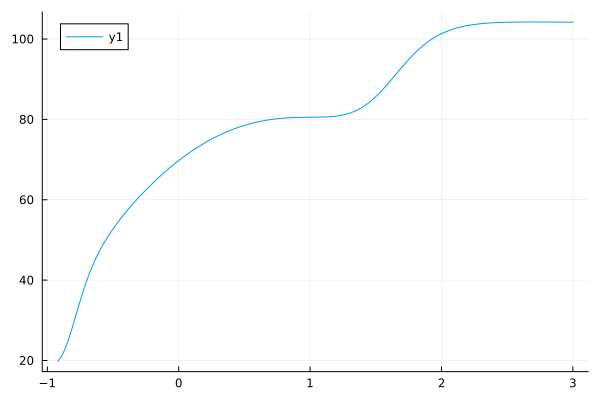

In [27]:
plot(log10.(Tlist),grhohighlist)